In [1]:
 #Jupyter Notebook

# Importando as bibliotecas necessárias
import os
import json
import subprocess
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Importação das bibliotecas necessárias
display_available = False
try:
    import plotly.express as px
    display_available = True
except ImportError:
    pass

# Configurações de exibição
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme(style="whitegrid")
pd.options.mode.chained_assignment = None  # Para evitar warnings de cópias de DataFrame

# Configurando os diretórios
input_dir = Path("runs")
output_dir = Path("results")
output_dir.mkdir(exist_ok=True)


## 2. Leitura e Exploração dos Dados

Carregue os dados usando pandas e explore as primeiras linhas, tipos de dados e estatísticas descritivas.

# Execução da Simulação do El Farol

In [2]:
def main():
    # Activate virtual environment (if needed, adjust path accordingly)
    venv_path = os.path.join(os.getcwd(), "venv")
    if os.path.exists(venv_path):
        activate_script = os.path.join(venv_path, "bin", "activate_this.py")
        with open(activate_script) as f:
            exec(f.read(), {'__file__': activate_script})

        # Read kernel_dir from config.json
    config_json_file = "config.json"        
    with open(config_json_file) as config_file:
        config = json.load(config_file)
        kernel_dir = config["paths"]["kernel"]
        analisys_dir = config["paths"]["analisys"]
        results_dir = config["paths"]["results"]
        runs_dir = config["paths"]["runs"]
        model_file = config["files"]["model"]
        scenarios_file = config["files"]["scenarios"]
        analisys_file = config["files"]["analisys"]



    # Remove CSV files in the 'runs' directory
    if os.path.exists(runs_dir):
        for file in os.listdir(runs_dir):
            if file.endswith(".csv"):
                os.remove(os.path.join(runs_dir, file))

    # Get current directory as app_dir
    app_dir = os.getcwd()


    # Change directory to kernel_dir and run ecosimp.py
    os.chdir(kernel_dir)
    subprocess.run(["python3", "ecosimp.py",
                     app_dir, config_json_file,
                     model_file, scenarios_file
                     ], 
                     check=True
                     )

    # Change back to the original directory
    os.chdir(app_dir)


if __name__ == "__main__":
    main()

Scenario: Scenario1 Run nr.: 1: 100%|██████| 100/100 [00:00<00:00, 4699.08it/s]


## 2. Leitura e Exploração dos Dados

Carregue os dados usando pandas e explore as primeiras linhas, tipos de dados e estatísticas descritivas.

In [3]:
# Encontrar o arquivo de simulação mais recente na pasta 'runs/'
runs_dir = 'runs/'
latest_file = sorted([f for f in os.listdir(runs_dir) if f.endswith('.csv')], reverse=True)[0]
sim_results = pd.read_csv(os.path.join(runs_dir, latest_file))

# Visualizar as primeiras linhas do DataFrame
sim_results.head()

,index_no,model,simulation,observer,scenario,run,step,time,agent_name,selected_predictor,predictor_fitness,predictor_prediction,my_play
0,0,elFarolClassic,elFarolClassic,LikeSixtyPercentPlayer_obs1,Scenario1,0,0,2025-12-20T13:36,L60p_0,st_trend_8w,0.872043,0,GOING
1,1,elFarolClassic,elFarolClassic,LikeSixtyPercentPlayer_obs1,Scenario1,0,0,2025-12-20T13:36,L60p_1,st_same_5w,0.925124,0,GOING
2,2,elFarolClassic,elFarolClassic,LikeSixtyPercentPlayer_obs1,Scenario1,0,0,2025-12-20T13:36,L60p_2,st_round_avg_4w,0.959998,2,GOING
3,3,elFarolClassic,elFarolClassic,LikeSixtyPercentPlayer_obs1,Scenario1,0,0,2025-12-20T13:36,L60p_3,st_trend_8w,0.545933,0,GOING
4,4,elFarolClassic,elFarolClassic,LikeSixtyPercentPlayer_obs1,Scenario1,0,0,2025-12-20T13:36,L60p_4,st_round_avg_4w,0.815637,0,GOING


In [4]:
# Informações gerais sobre os dados
sim_results.info()

# Estatísticas descritivas
sim_results.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index_no              2000 non-null   int64  
 1   model                 2000 non-null   object 
 2   simulation            2000 non-null   object 
 3   observer              2000 non-null   object 
 4   scenario              2000 non-null   object 
 5   run                   2000 non-null   int64  
 6   step                  2000 non-null   int64  
 7   time                  2000 non-null   object 
 8   agent_name            2000 non-null   object 
 9   selected_predictor    2000 non-null   object 
 10  predictor_fitness     2000 non-null   float64
 11  predictor_prediction  2000 non-null   int64  
 12  my_play               2000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 203.3+ KB


,index_no,model,simulation,observer,scenario,run,step,time,agent_name,selected_predictor,predictor_fitness,predictor_prediction,my_play
count,2000.000000,2000,2000,2000,2000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000
unique,NaN,1,1,1,1,NaN,NaN,1,10,4,NaN,NaN,2
top,NaN,elFarolClassic,elFarolClassic,LikeSixtyPercentPlayer_obs1,Scenario1,NaN,NaN,2025-12-20T13:36,L60p_0,st_round_avg_4w,NaN,NaN,NOT GOING
freq,NaN,2000,2000,2000,2000,NaN,NaN,2000,200,800,NaN,NaN,1146
mean,999.500000,NaN,NaN,NaN,NaN,0.500000,49.500000,NaN,NaN,NaN,0.014837,5.299000,NaN
std,577.494589,NaN,NaN,NaN,NaN,0.500125,28.873289,NaN,NaN,NaN,0.086789,7.106677,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,499.750000,NaN,NaN,NaN,NaN,0.000000,24.750000,NaN,NaN,NaN,0.004049,4.000000,NaN
50%,999.500000,NaN,NaN,NaN,NaN,0.500000,49.500000,NaN,NaN,NaN,0.004630,4.000000,NaN
75%,1499.250000,NaN,NaN,NaN,NaN,1.000000,74.250000,NaN,NaN,NaN,0.004695,5.000000,NaN


## 3. Pré-processamento dos Dados

Realize limpeza, tratamento de valores ausentes e transformação de variáveis conforme necessário.

In [5]:
# Verificar valores ausentes
dados_faltantes = sim_results.isnull().sum()
print("Valores ausentes por coluna:\n", dados_faltantes)

# Exemplo de tratamento: remover linhas com valores ausentes (ajuste conforme necessário)
sim_results = sim_results.dropna()


Valores ausentes por coluna:
 index_no                0
model                   0
simulation              0
observer                0
scenario                0
run                     0
step                    0
time                    0
agent_name              0
selected_predictor      0
predictor_fitness       0
predictor_prediction    0
my_play                 0
dtype: int64


## 4. Análise Exploratória dos Dados

Crie gráficos e tabelas para entender padrões e relações nos dados.

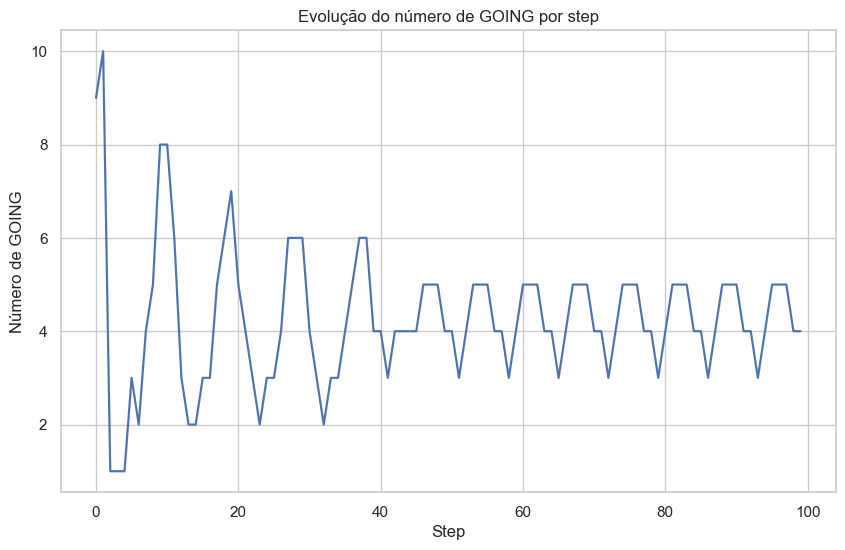

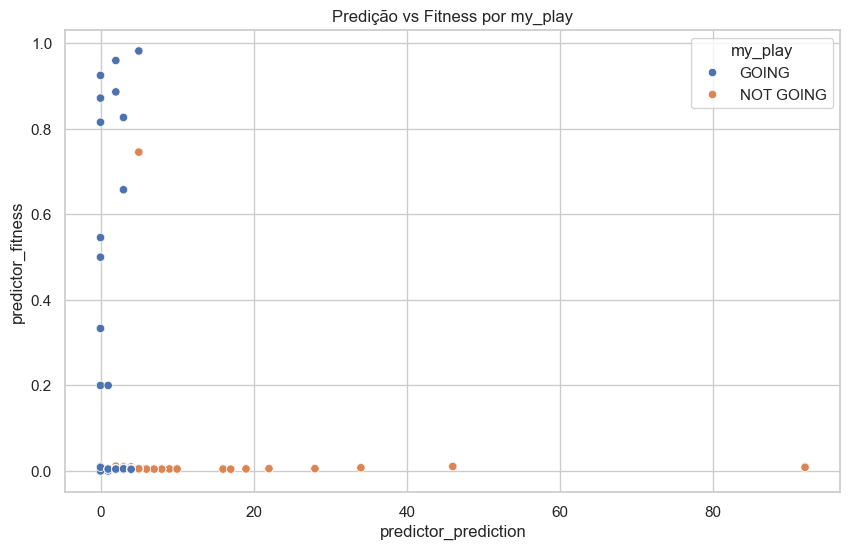

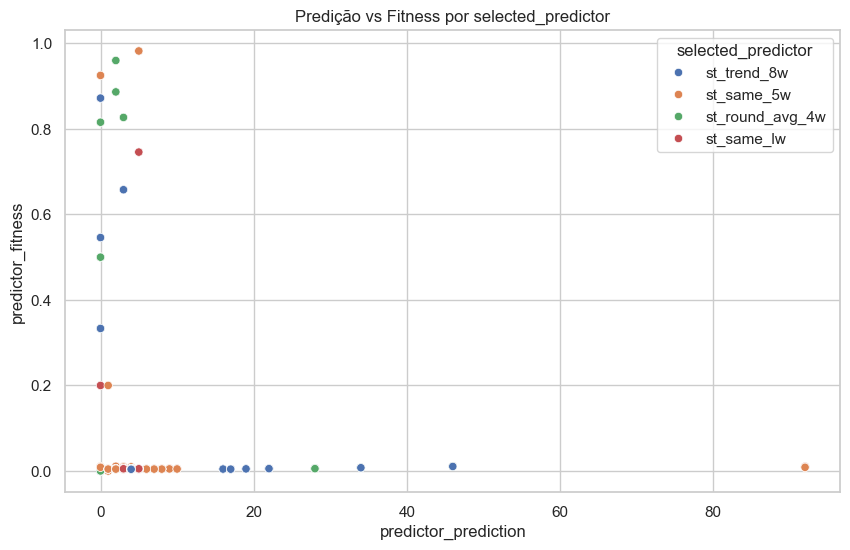

In [6]:
# Agrupamento semelhante ao R: attendance por run, step, my_play
attendance = sim_results.groupby(['run', 'step', 'my_play']).size().reset_index(name='n')

# Gráfico: Evolução do número de "GOING" ao longo do tempo
plt.figure()
sns.lineplot(data=attendance[attendance['my_play'] == 'GOING'], x='step', y='n')
plt.title('Evolução do número de GOING por step')
plt.xlabel('Step')
plt.ylabel('Número de GOING')
plt.show()

# Gráfico: Relação entre predição e fitness por my_play
plt.figure()
sns.scatterplot(data=sim_results, x='predictor_prediction', y='predictor_fitness', hue='my_play')
plt.title('Predição vs Fitness por my_play')
plt.show()

# Gráfico: Relação entre predição e fitness por selected_predictor
plt.figure()
sns.scatterplot(data=sim_results, x='predictor_prediction', y='predictor_fitness', hue='selected_predictor')
plt.title('Predição vs Fitness por selected_predictor')
plt.show()


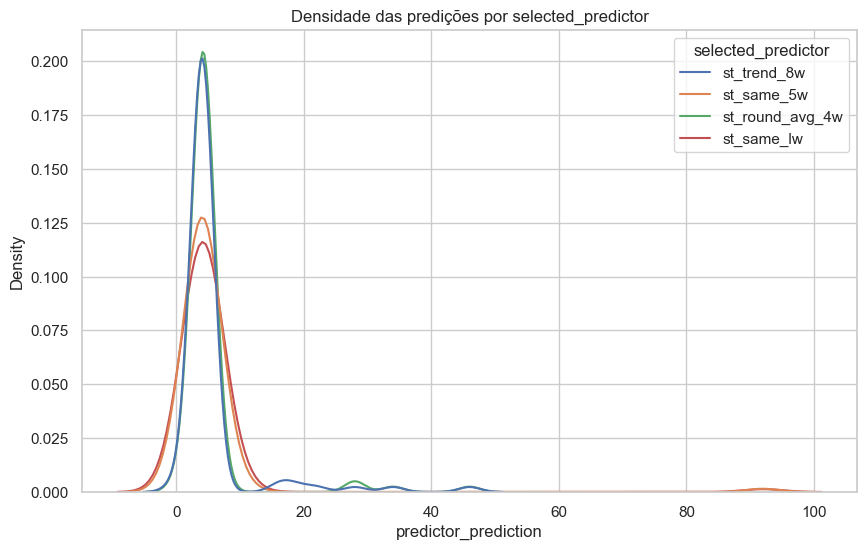

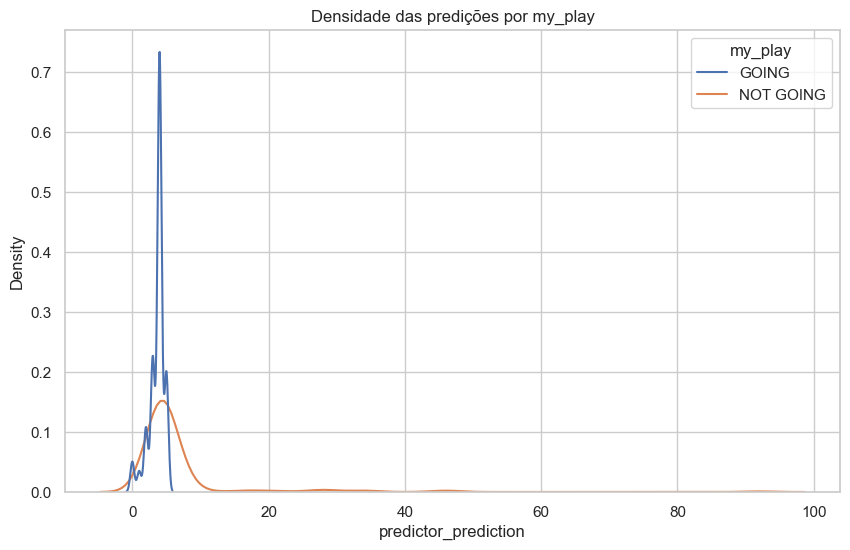

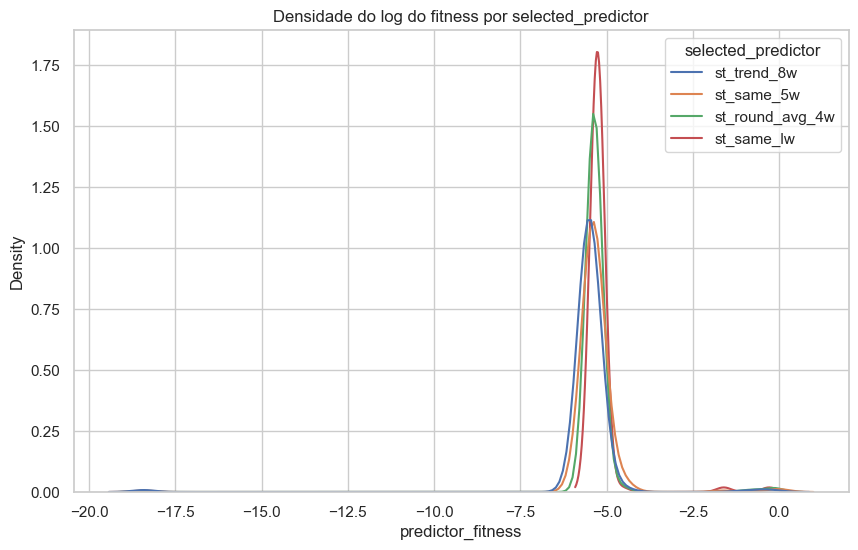

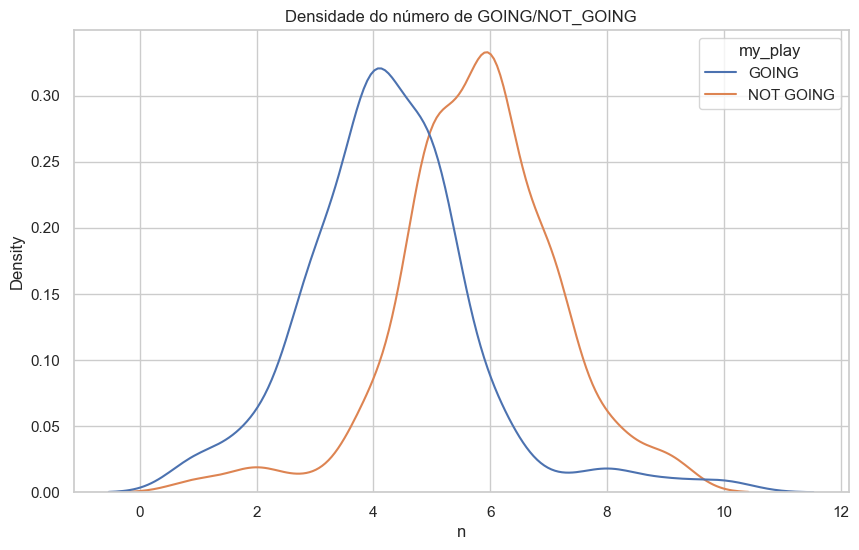

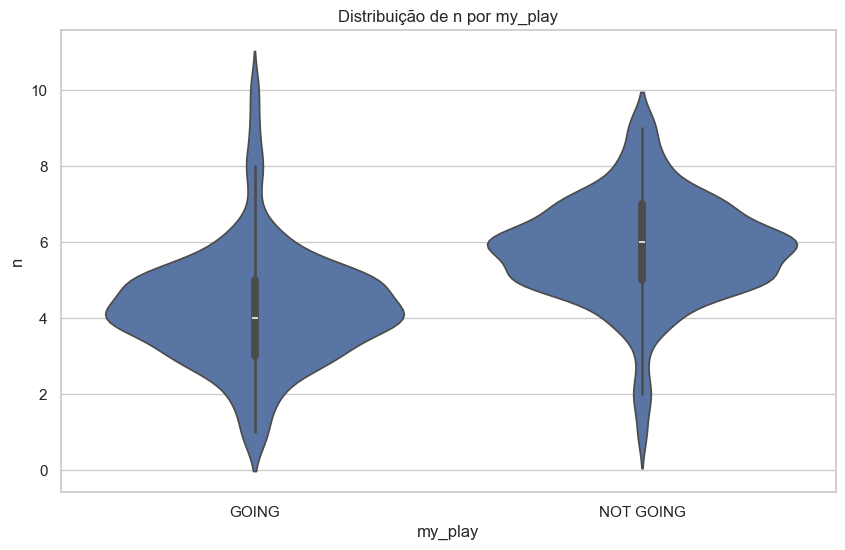

In [7]:
# Densidade das predições por selected_predictor
plt.figure()
sns.kdeplot(data=sim_results, x='predictor_prediction', hue='selected_predictor', common_norm=False)
plt.title('Densidade das predições por selected_predictor')
plt.show()

# Densidade das predições por my_play
plt.figure()
sns.kdeplot(data=sim_results, x='predictor_prediction', hue='my_play', common_norm=False)
plt.title('Densidade das predições por my_play')
plt.show()

# Densidade do log do fitness por selected_predictor
plt.figure()
sns.kdeplot(data=sim_results, x=np.log(sim_results['predictor_fitness']+1e-8), hue='selected_predictor', common_norm=False)
plt.title('Densidade do log do fitness por selected_predictor')
plt.show()

# Densidade do número de GOING/NOT_GOING
plt.figure()
sns.kdeplot(data=attendance, x='n', hue='my_play', common_norm=False)
plt.title('Densidade do número de GOING/NOT_GOING')
plt.show()

# Violino: distribuição de n por my_play
plt.figure()
sns.violinplot(data=attendance, x='my_play', y='n')
plt.title('Distribuição de n por my_play')
plt.show()


## 5. Implementação do Modelo em Python

Implemente o modelo originalmente em R, agora em Python, utilizando as bibliotecas apropriadas.

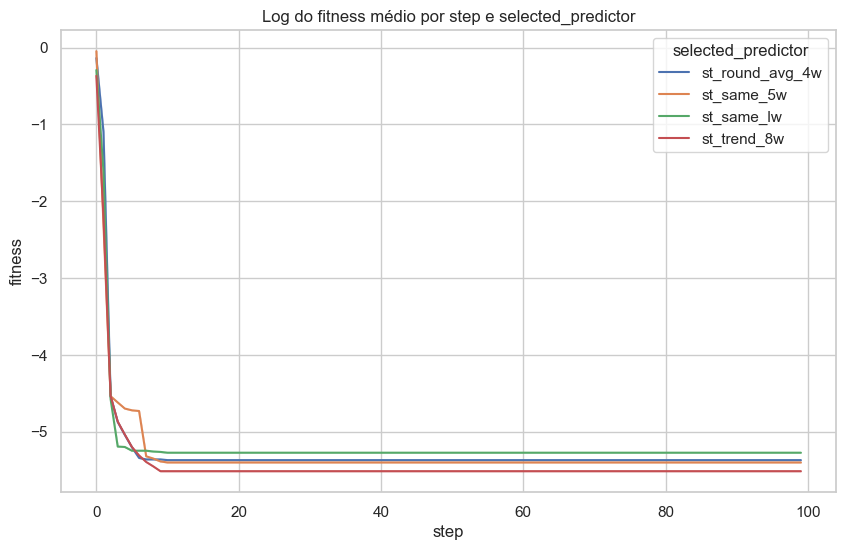

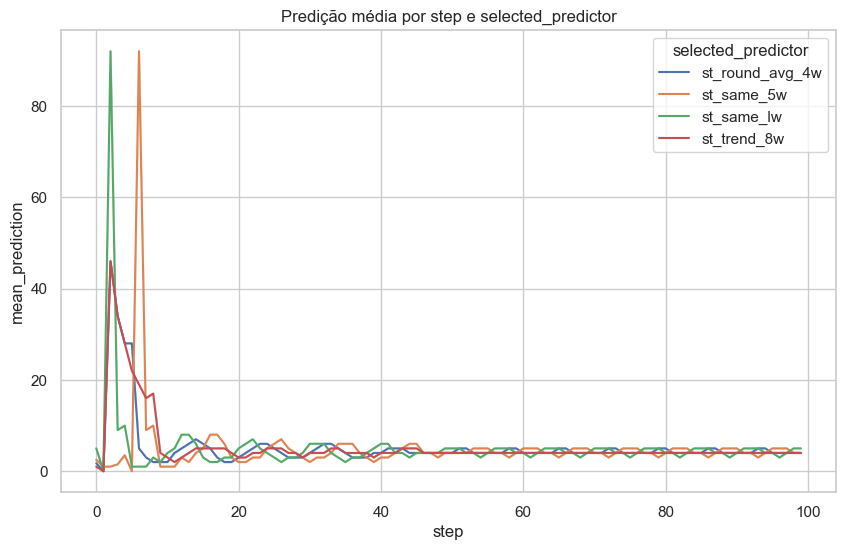

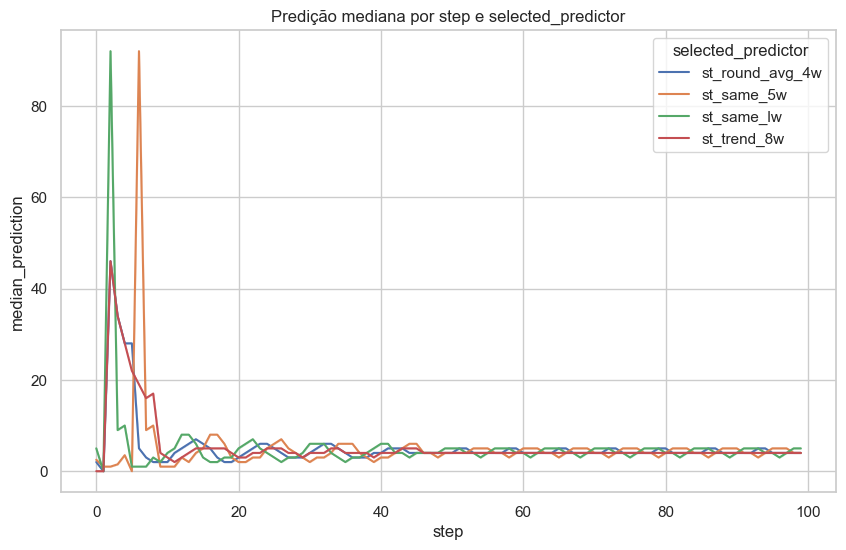

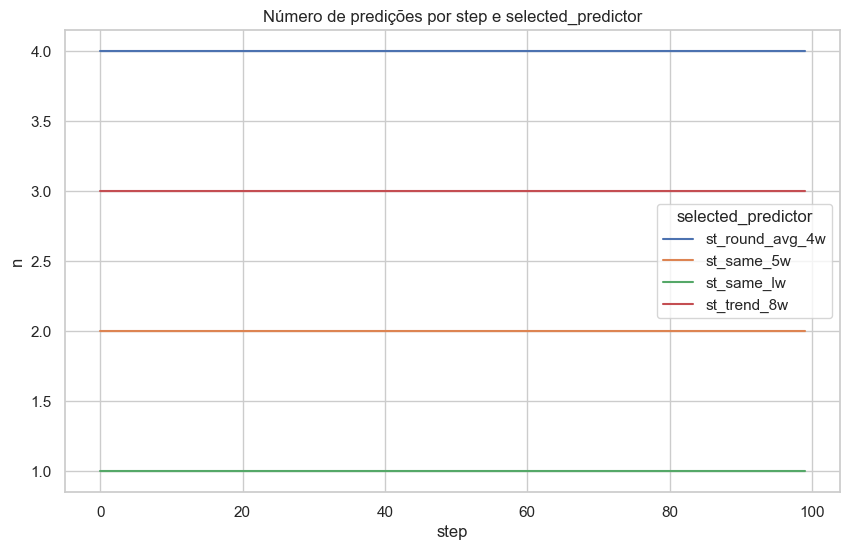

In [8]:
# Agrupamento semelhante ao bloco R 'predictors'
predictors = sim_results.groupby(['run', 'step', 'selected_predictor']).agg(
    fitness=('predictor_fitness', 'mean'),
    mean_prediction=('predictor_prediction', 'mean'),
    median_prediction=('predictor_prediction', 'median'),
    n=('predictor_prediction', 'count')
).reset_index()

# Visualização dos resultados do modelo
plt.figure()
sns.lineplot(data=predictors, x='step', y=np.log(predictors['fitness']+1e-8), hue='selected_predictor')
plt.title('Log do fitness médio por step e selected_predictor')
plt.show()

plt.figure()
sns.lineplot(data=predictors, x='step', y='mean_prediction', hue='selected_predictor')
plt.title('Predição média por step e selected_predictor')
plt.show()

plt.figure()
sns.lineplot(data=predictors, x='step', y='median_prediction', hue='selected_predictor')
plt.title('Predição mediana por step e selected_predictor')
plt.show()

plt.figure()
sns.lineplot(data=predictors, x='step', y='n', hue='selected_predictor')
plt.title('Número de predições por step e selected_predictor')
plt.show()


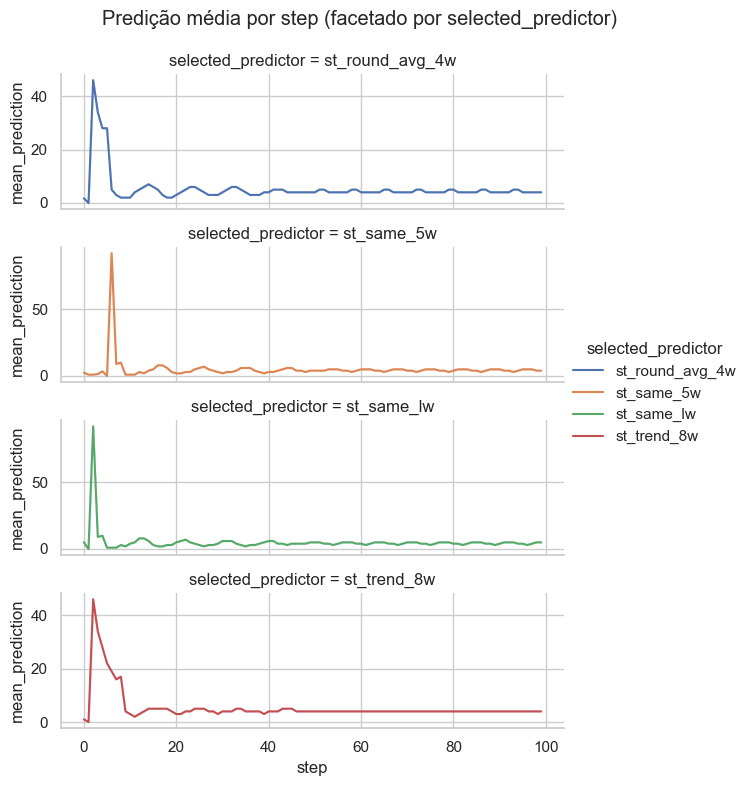

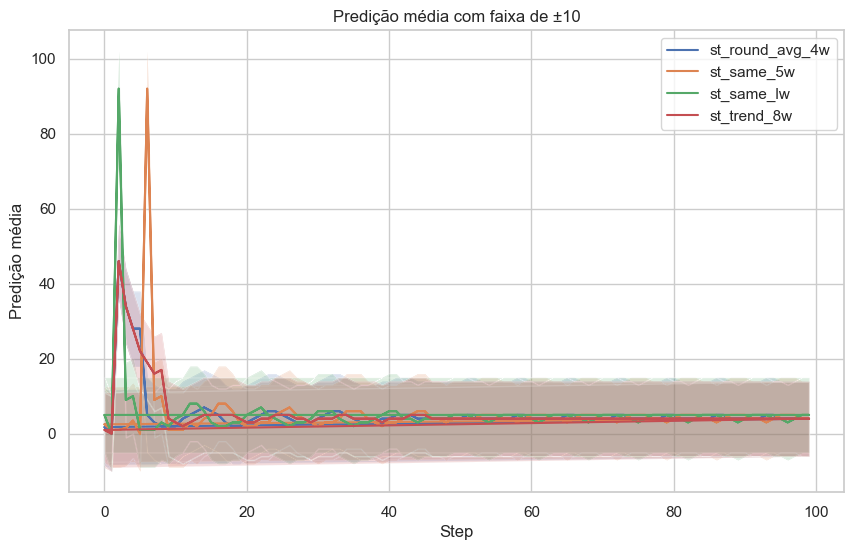

In [9]:
# Visualização com facet_grid (usando FacetGrid do seaborn)
g = sns.FacetGrid(predictors, row='selected_predictor', hue='selected_predictor', aspect=3, height=2, sharey=False)
g.map(sns.lineplot, 'step', 'mean_prediction')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Predição média por step (facetado por selected_predictor)')
plt.show()

# Ribbon plot (faixa de incerteza)
plt.figure()
for name, group in predictors.groupby('selected_predictor'):
    plt.plot(group['step'], group['mean_prediction'], label=name)
    plt.fill_between(group['step'], group['mean_prediction']-10, group['mean_prediction']+10, alpha=0.2)
plt.title('Predição média com faixa de ±10')
plt.xlabel('Step')
plt.ylabel('Predição média')
plt.legend()
plt.show()


## 6. Avaliação dos Resultados

Avalie o desempenho do modelo utilizando métricas adequadas e compare com os resultados esperados.

In [10]:
# Exemplo de avaliação: análise descritiva dos resultados
# (Adapte conforme as métricas relevantes para o seu problema)
print('Estatísticas descritivas do fitness por selected_predictor:')
print(predictors.groupby('selected_predictor')['fitness'].describe())


Estatísticas descritivas do fitness por selected_predictor:
                    count      mean       std       min       25%       50%  \
selected_predictor                                                            
st_round_avg_4w     200.0  0.016739  0.092219  0.004657  0.004657  0.004657   
st_same_5w          200.0  0.015218  0.095040  0.004517  0.004517  0.004517   
st_same_lw          200.0  0.014549  0.076198  0.005128  0.005128  0.005128   
st_trend_8w         200.0  0.012142  0.069320  0.004032  0.004032  0.004032   

                         75%       max  
selected_predictor                      
st_round_avg_4w     0.004657  0.872246  
st_same_5w          0.004517  0.953702  
st_same_lw          0.005128  0.745794  
st_trend_8w         0.004032  0.691908  


## 7. Visualização dos Resultados

Gere gráficos para ilustrar os resultados do modelo e facilitar a interpretação.

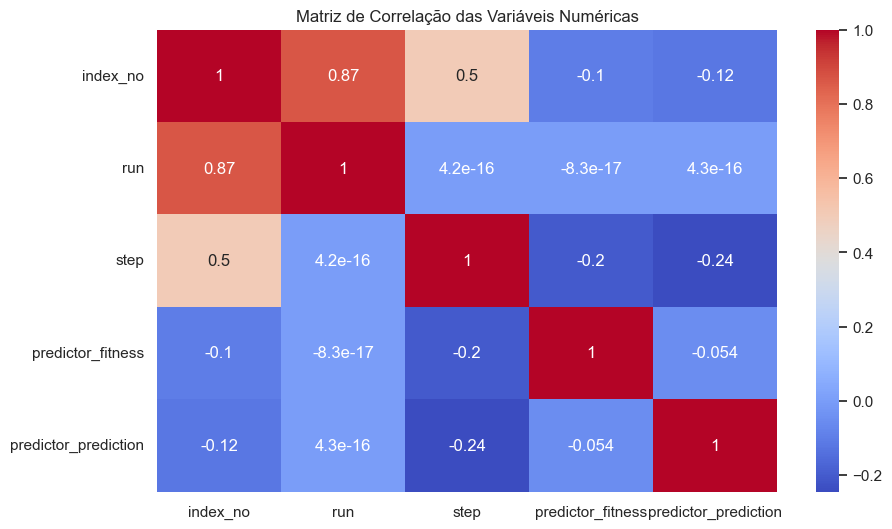

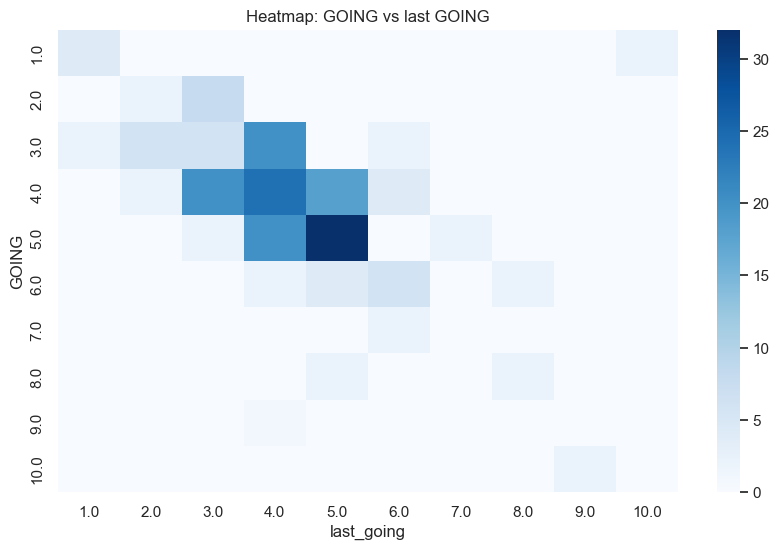

KeyError: 'NOT_GOING'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Exemplo de visualização: matriz de correlação
plt.figure()
sns.heatmap(sim_results.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

# Visualização de mudança de frequência (semelhante ao bloco R 'changing')
frequencies = attendance.pivot_table(index=['run', 'step'], columns='my_play', values='n', fill_value=0).reset_index()
frequencies.columns.name = None
frequencies['last_going'] = frequencies['GOING'].shift(1)
frequencies['last_not_going'] = frequencies['NOT GOING'].shift(1)

plt.figure()
sns.heatmap(pd.crosstab(frequencies['GOING'], frequencies['last_going']), cmap='Blues')
plt.title('Heatmap: GOING vs last GOING')
plt.show()

plt.figure()
sns.heatmap(pd.crosstab(frequencies['NOT GOING'], frequencies['last_not_going']), cmap='Reds')
plt.title('Heatmap: NOT GOING vs last NOT GOING')
plt.show()
